In [1]:
import sys
sys.path.append('.')

import model

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

In [3]:
plt.rcParams["font.family"] = "serif"

# 2D Lattice with rewiring

We start with an $m \times n$ periodic square lattice.

In [4]:
N, M = (45, 45)

g = nx.grid_2d_graph(N, M, periodic=True, create_using=None)

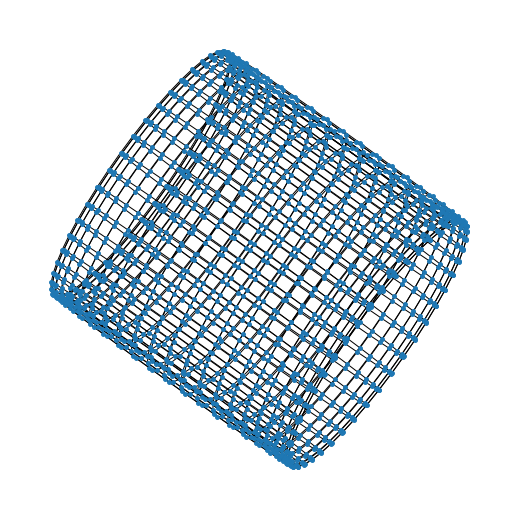

In [5]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
foo = nx.draw_spectral(g,
                node_size = 15)

In [6]:
dummy_g = nx.grid_2d_graph(
        N,
        M,
        periodic=True,
        create_using=None
    )
torus_pos = nx.spectral_layout(dummy_g)

Then for each edge $(u,v)$, with probability $p$, we replace that edge with a new edge $(u,w)$, where $w$ is randomly sampled from the existing nodes.

In [7]:
g = model.grid_r(N,M, 0.1)

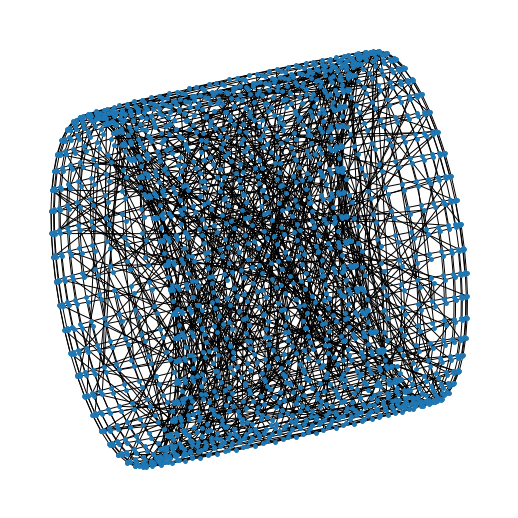

In [8]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw(g,
        pos = torus_pos,
        node_size = 15)

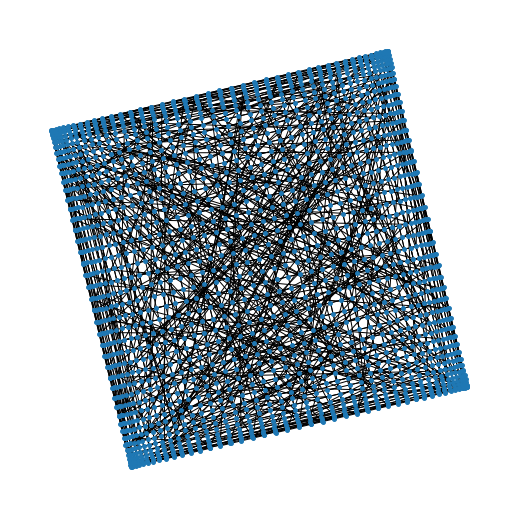

In [9]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw(g,
        pos = model.grid_pos(g),
        node_size = 15)

In [10]:
E = len(g.edges)

$\Sigma x^2$

In [11]:
def square_lattice_rewiring_case(N, M, p, **kwargs):

    g = nx.grid_2d_graph(N, M, periodic=True)

    for e in g.edges:
        if random.random() <= p:
            g.remove_edge(e[0],e[1])
            v = random.choice(list(g.nodes()))
            g.add_edge(e[0], v)

    g.graph['N'] = N
    g.graph['M'] = M
    g.graph['p'] = p

    return g, kwargs


def square_r_case_generator(N, M, **kwargs):
    def sqrg(**kwargs):
        return square_lattice_rewiring_case(N, M, **kwargs)
    
    return sqrg

In [12]:
g, kw = square_lattice_rewiring_case(45, 45, .9)

In [13]:
list(g.edges(data=True))

[((0, 0), (44, 0), {}),
 ((0, 0), (44, 44), {}),
 ((0, 0), (42, 7), {}),
 ((0, 0), (23, 12), {}),
 ((0, 0), (42, 23), {}),
 ((0, 1), (1, 1), {}),
 ((0, 1), (44, 1), {}),
 ((0, 1), (37, 22), {}),
 ((0, 1), (39, 43), {}),
 ((0, 2), (30, 28), {}),
 ((0, 2), (44, 31), {}),
 ((0, 2), (33, 27), {}),
 ((0, 2), (15, 10), {}),
 ((0, 3), (1, 3), {}),
 ((0, 3), (27, 8), {}),
 ((0, 3), (12, 38), {}),
 ((0, 3), (30, 17), {}),
 ((0, 4), (33, 15), {}),
 ((0, 4), (39, 22), {}),
 ((0, 4), (14, 14), {}),
 ((0, 4), (0, 11), {}),
 ((0, 4), (41, 29), {}),
 ((0, 5), (12, 16), {}),
 ((0, 5), (43, 18), {}),
 ((0, 5), (0, 14), {}),
 ((0, 5), (10, 8), {}),
 ((0, 6), (39, 12), {}),
 ((0, 6), (13, 6), {}),
 ((0, 6), (1, 36), {}),
 ((0, 7), (9, 44), {}),
 ((0, 7), (30, 12), {}),
 ((0, 7), (16, 20), {}),
 ((0, 7), (2, 30), {}),
 ((0, 7), (38, 7), {}),
 ((0, 7), (39, 3), {}),
 ((0, 8), (1, 8), {}),
 ((0, 8), (42, 28), {}),
 ((0, 8), (39, 38), {}),
 ((0, 8), (13, 15), {}),
 ((0, 8), (24, 33), {}),
 ((0, 8), (38, 28),

In [14]:
#model.square_distance(list(g.edges(data=True))[1000], 45, 45)

[model.square_distance(e, 45, 45) for e in list(g.edges(data=True))]

[44.0,
 62.22539674441618,
 42.579337712087536,
 25.942243542145693,
 47.885279575251516,
 1.0,
 44.0,
 42.5440947723653,
 57.3149195236284,
 39.698866482558415,
 52.69724850502159,
 41.400483088968905,
 17.0,
 1.0,
 27.459060435491963,
 37.0,
 33.1058907144937,
 34.785054261852174,
 42.95346318982906,
 17.204650534085253,
 7.0,
 48.02082881417188,
 16.278820596099706,
 44.9221548904324,
 9.0,
 10.44030650891055,
 39.45883931389772,
 13.0,
 30.01666203960727,
 38.07886552931954,
 30.4138126514911,
 20.615528128088304,
 23.08679276123039,
 38.0,
 39.20459156782532,
 1.0,
 46.51881339845203,
 49.20365840057018,
 14.7648230602334,
 34.655446902326915,
 42.941821107167776,
 32.55764119219941,
 34.48187929913333,
 15.297058540778355,
 35.17101079013795,
 1.0,
 42.04759208325728,
 30.805843601498726,
 12.0,
 29.068883707497267,
 31.0,
 41.86884283091664,
 7.211102550927978,
 33.61547262794322,
 26.40075756488817,
 39.81205847478876,
 39.05124837953327,
 19.209372712298546,
 18.43908891458577

# Generate (q,r) varied data for new results.

We start with an $m \times n$ periodic square lattice.

In [15]:
## Population parameters:
base_params_QR = {
    # will this work?
    'p' : 0.15,
    
    # Node parameter
    'A' : 1.0, # 
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## all edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

To figure out the right intervals for $(q,r)$ so that there are 

In [16]:
0.1 * len(g.edges)

404.40000000000003

In [17]:
0.9 * len(g.edges)

3639.6

In [18]:
conditions_QR = {}

p = base_params_QR['p']

# ratio of delta_q to delta_r so that delta_q * D = delta_r * C
qrE_ratio = ( 1 - p ) / p 

delta_r = 0.05

#q_range = np.arange(0, 1, qrE_ratio * delta_r)
#r_range = np.arange(0, 1, delta_r)

## FOR TESTING
q_range = np.arange(0.05, 1, qrE_ratio * delta_r)
r_range = np.arange(.0, 1.0, delta_r)


for q in q_range:
    for r in r_range:
        conditions_QR[f'q-{q}_r-{r}'] = {
            'C' : model.qr_knockout_lattice_proportional(g, q, r),
            'q' : q,
            'r' : r
        }
        
print(len(conditions_QR))

80


In [19]:
qrE_ratio

5.666666666666667

In [20]:
delta_r * qrE_ratio 

0.2833333333333334

In [21]:
delta_r * E * (1 - p)

172.0825

In [22]:
delta_r * qrE_ratio * E * p

172.08250000000004

In [23]:
conditions_QR

{'q-0.05_r-0.0': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.0},
 'q-0.05_r-0.05': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.05},
 'q-0.05_r-0.1': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.1},
 'q-0.05_r-0.15000000000000002': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.15000000000000002},
 'q-0.05_r-0.2': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.2},
 'q-0.05_r-0.25': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.25},
 'q-0.05_r-0.30000000000000004': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.30000000000000004},
 'q-0.05_r-0.35000000000000003': {'C': <function model.qr_knockout_lattice_proportion

$T \sim (pq + (1-p)r)N$

In [24]:
def dfr(rs):
    return pd.DataFrame(
        [r for case in rs 
         for r in model.data_from_results(rs, case)])

In [25]:
runs = 512

N, M = (45, 45)

results = model.experiment(
    square_r_case_generator(N, M),
    base_params_QR,
    conditions_QR,
    runs
)

temp_QR = dfr(results)
temp_QR.to_csv('data/QR_square_study_20220731_512_p015a.csv')


Starting q-0.05_r-0.0
Initializing input graphs
graphs prepared in 12.012330258001384
Finished q-0.05_r-0.0 in 218.44198513799893
Starting q-0.05_r-0.05
Initializing input graphs
graphs prepared in 12.262385474999974
Finished q-0.05_r-0.05 in 232.68455891599842
Starting q-0.05_r-0.1
Initializing input graphs
graphs prepared in 11.956599748998997
Finished q-0.05_r-0.1 in 244.59465262400045
Starting q-0.05_r-0.15000000000000002
Initializing input graphs
graphs prepared in 12.391802362002636
Finished q-0.05_r-0.15000000000000002 in 231.71428783900046
Starting q-0.05_r-0.2
Initializing input graphs
graphs prepared in 12.645973209000658
Finished q-0.05_r-0.2 in 236.84863505700196
Starting q-0.05_r-0.25
Initializing input graphs
graphs prepared in 13.04367821499909
Finished q-0.05_r-0.25 in 220.31024357700153
Starting q-0.05_r-0.30000000000000004
Initializing input graphs
graphs prepared in 13.152953990000242
Finished q-0.05_r-0.30000000000000004 in 226.27073505600129
Starting q-0.05_r-0.350

graphs prepared in 12.475871884998924
Finished q-0.6166666666666668_r-0.6000000000000001 in 95.4264934999992
Starting q-0.6166666666666668_r-0.65
Initializing input graphs
graphs prepared in 12.421261310999398
Finished q-0.6166666666666668_r-0.65 in 90.34540643799846
Starting q-0.6166666666666668_r-0.7000000000000001
Initializing input graphs
graphs prepared in 12.501014335997752
Finished q-0.6166666666666668_r-0.7000000000000001 in 81.32176768999852
Starting q-0.6166666666666668_r-0.75
Initializing input graphs
graphs prepared in 13.715267308001785
Finished q-0.6166666666666668_r-0.75 in 75.44563224100057
Starting q-0.6166666666666668_r-0.8
Initializing input graphs
graphs prepared in 13.928357028999017
Finished q-0.6166666666666668_r-0.8 in 73.17111343400029
Starting q-0.6166666666666668_r-0.8500000000000001
Initializing input graphs
graphs prepared in 13.918692990002455
Finished q-0.6166666666666668_r-0.8500000000000001 in 74.03476061800029
Starting q-0.6166666666666668_r-0.9
Initia

In [26]:
data1 = pd.read_csv('data/QR_square_study_20220726_256_p015.csv')
data2 = pd.read_csv('data/QR_square_study_20220731_512_p015a.csv')

data3 = pd.concat([data1, data2])
data3.to_csv('data/QR_square_study_p015-all.csv')